<a href="https://colab.research.google.com/github/FarooqBaig/Emotion-Detection/blob/main/NewFer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [3]:
! gdown --id 1xRQiQmyViz_SNKKquPe5VDurVq5F5sC4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xRQiQmyViz_SNKKquPe5VDurVq5F5sC4
To: /content/FERNew.zip
100% 54.9M/54.9M [00:00<00:00, 201MB/s]


In [4]:
!unzip 'FERNew.zip'

Streaming output truncated to the last 5000 lines.
  inflating: FERNew/FER/train/sad/Training_78711005.jpg  
  inflating: FERNew/FER/train/sad/Training_78713328.jpg  
  inflating: FERNew/FER/train/sad/Training_78714614.jpg  
  inflating: FERNew/FER/train/sad/Training_78744933.jpg  
  inflating: FERNew/FER/train/sad/Training_78746497.jpg  
  inflating: FERNew/FER/train/sad/Training_78771425.jpg  
  inflating: FERNew/FER/train/sad/Training_78793953.jpg  
  inflating: FERNew/FER/train/sad/Training_78798891.jpg  
  inflating: FERNew/FER/train/sad/Training_78808789.jpg  
  inflating: FERNew/FER/train/sad/Training_78818631.jpg  
  inflating: FERNew/FER/train/sad/Training_78822832.jpg  
  inflating: FERNew/FER/train/sad/Training_78842185.jpg  
  inflating: FERNew/FER/train/sad/Training_78850836.jpg  
  inflating: FERNew/FER/train/sad/Training_7885587.jpg  
  inflating: FERNew/FER/train/sad/Training_78975310.jpg  
  inflating: FERNew/FER/train/sad/Training_78985679.jpg  
  inflating: FERNew/FE

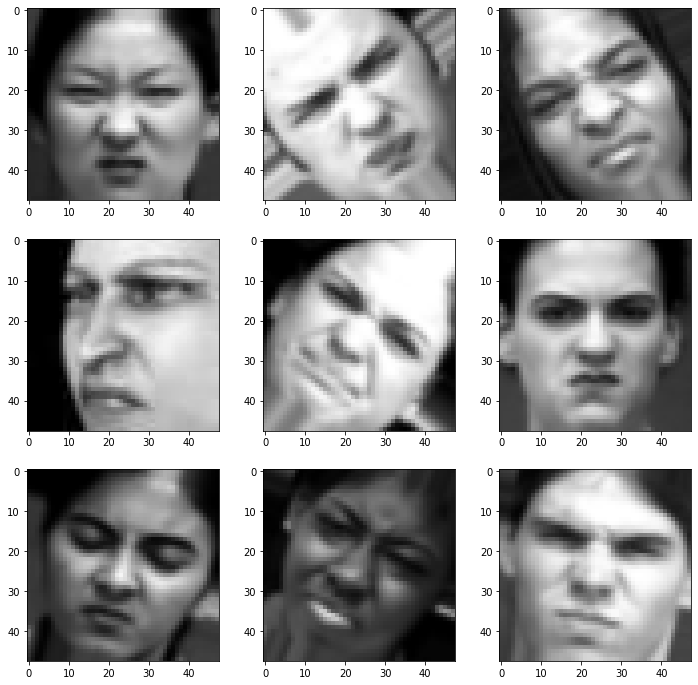

In [5]:
picture_size = 48
folder_path = "FERNew/FER/"
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [6]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 31754 images belonging to 7 classes.
Found 7773 images belonging to 7 classes.


In [7]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                

Epoch 1/48
247/248 [============================>.] - ETA: 0s - loss: 1.7044 - accuracy: 0.3536

248/248 [==============================] - 26s 65ms/step - loss: 1.7036 - accuracy: 0.3540 - val_loss: 1.4964 - val_accuracy: 0.4299 - lr: 0.0010
Epoch 2/48
248/248 [==============================] - ETA: 0s - loss: 1.3624 - accuracy: 0.4834

248/248 [==============================] - 16s 66ms/step - loss: 1.3624 - accuracy: 0.4834 - val_loss: 1.3793 - val_accuracy: 0.4747 - lr: 0.0010
Epoch 3/48
247/248 [============================>.] - ETA: 0s - loss: 1.2216 - accuracy: 0.5354

248/248 [==============================] - 16s 62ms/step - loss: 1.2220 - accuracy: 0.5354 - val_loss: 1.4829 - val_accuracy: 0.4185 - lr: 0.0010
Epoch 4/48
248/248 [==============================] - ETA: 0s - loss: 1.1291 - accuracy: 0.5735

248/248 [==============================] - 16s 65ms/step - loss: 1.1291 - accuracy: 0.5735 - val_loss: 1.1856 - val_accuracy: 0.5484 - lr: 0.0010
Epoch 5/48
248/248 [==============================] - ETA: 0s - loss: 1.0717 - accuracy: 0.5933

248/248 [==============================] - 16s 64ms/step - loss: 1.0717 - accuracy: 0.5933 - val_loss: 1.3987 - val_accuracy: 0.4525 - lr: 0.0010
Epoch 6/48
248/248 [==============================] - ETA: 0s - loss: 1.0228 - accuracy: 0.6148

248/248 [==============================] - 16s 63ms/step - loss: 1.0228 - accuracy: 0.6148 - val_loss: 1.1847 - val_accuracy: 0.5292 - lr: 0.0010
Epoch 7/48
248/248 [==============================] - ETA: 0s - loss: 0.9728 - accuracy: 0.6319

248/248 [==============================] - 17s 67ms/step - loss: 0.9728 - accuracy: 0.6319 - val_loss: 1.1136 - val_accuracy: 0.5824 - lr: 0.0010
Epoch 8/48
248/248 [==============================] - ETA: 0s - loss: 0.9253 - accuracy: 0.6531

248/248 [==============================] - 16s 64ms/step - loss: 0.9253 - accuracy: 0.6531 - val_loss: 1.1216 - val_accuracy: 0.5859 - lr: 0.0010
Epoch 9/48
248/248 [==============================] - ETA: 0s - loss: 0.8990 - accuracy: 0.6631

248/248 [==============================] - 16s 63ms/step - loss: 0.8990 - accuracy: 0.6631 - val_loss: 1.2567 - val_accuracy: 0.5289 - lr: 0.0010
Epoch 10/48
248/248 [==============================] - ETA: 0s - loss: 0.8465 - accuracy: 0.6829

248/248 [==============================] - 17s 68ms/step - loss: 0.8465 - accuracy: 0.6829 - val_loss: 1.0918 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 11/48
248/248 [==============================] - ETA: 0s - loss: 0.8102 - accuracy: 0.6964

248/248 [==============================] - 16s 64ms/step - loss: 0.8102 - accuracy: 0.6964 - val_loss: 1.1348 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 12/48
248/248 [==============================] - ETA: 0s - loss: 0.7725 - accuracy: 0.7128

248/248 [==============================] - 16s 66ms/step - loss: 0.7725 - accuracy: 0.7128 - val_loss: 1.2040 - val_accuracy: 0.5493 - lr: 0.0010
Epoch 13/48
248/248 [==============================] - ETA: 0s - loss: 0.7295 - accuracy: 0.7304

248/248 [==============================] - 16s 64ms/step - loss: 0.7295 - accuracy: 0.7304 - val_loss: 1.0695 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 14/48
248/248 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.7448

248/248 [==============================] - 16s 63ms/step - loss: 0.6889 - accuracy: 0.7448 - val_loss: 1.2785 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 15/48
248/248 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.7560

248/248 [==============================] - 17s 67ms/step - loss: 0.6672 - accuracy: 0.7560 - val_loss: 1.1726 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 16/48
248/248 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.7771Restoring model weights from the end of the best epoch: 13.



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
248/248 [==============================] - 16s 64ms/step - loss: 0.6043 - accuracy: 0.7771 - val_loss: 1.0961 - val_accuracy: 0.6242 - lr: 0.0010
Epoch 16: early stopping


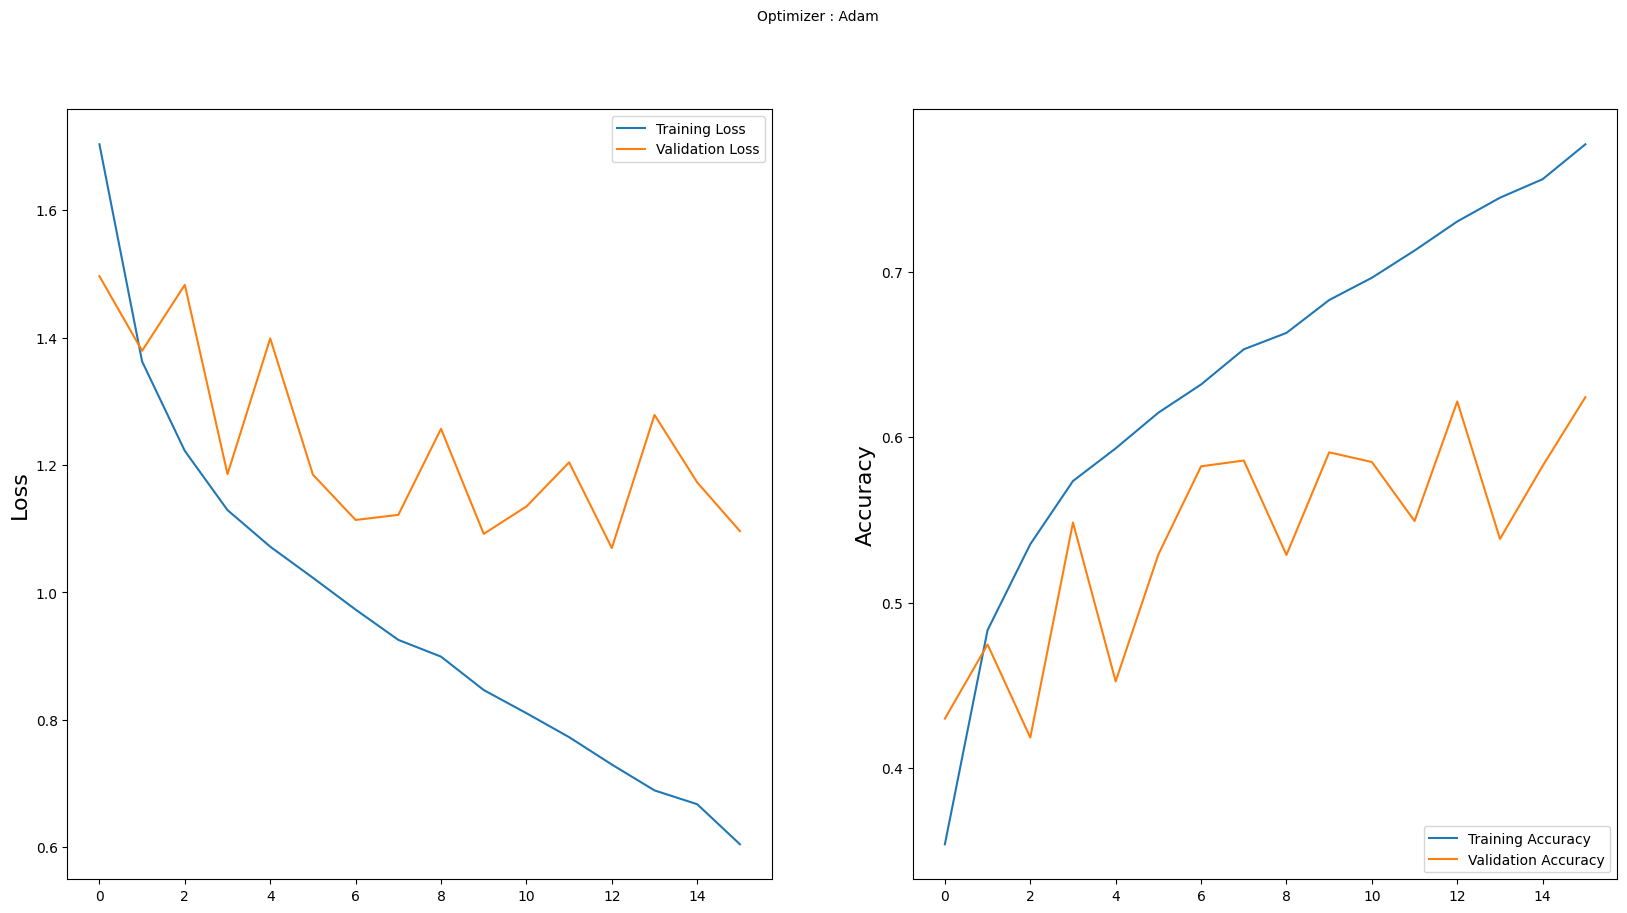

In [10]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
model.save('NewFer.h5')

In [12]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [14]:
!cp NewFer.h5 '/content/gdrive/My Drive/'
!ls -lt '/content/gdrive/My Drive/' 

total 52595
-rw------- 1 root root 53852512 Nov 18 03:56  NewFer.h5
drwx------ 2 root root     4096 Nov 18 00:41 'Colab Notebooks'
